In [1]:
import pandas as pd

## Data Analysis

In [2]:
v80 = pd.read_csv('../dataset/v80_200Hz.csv', index_col=None)

In [3]:
v80.isnull().any()

y    False
z    False
dtype: bool

In [4]:
v80.head()

,y,z
0,0.006662,0.000472
1,0.006657,0.000472
2,0.006647,0.000471
3,0.006629,0.000469
4,0.006604,0.000468


,y,z
y,1.000000,0.979672
z,0.979672,1.000000


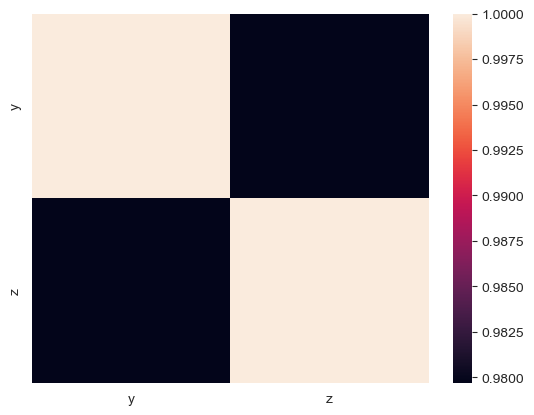

In [6]:
import seaborn as sns
corr = v80.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

## Feature Engineering

In [45]:
import pandas as pd
def feature_engineering(filename, window_size, label):
    raw_data = pd.read_csv(filename)[::10]
    raw_data = np.array(raw_data)
    features = pd.DataFrame()
    labels = pd.DataFrame()
    for i in range(0,raw_data.shape[0]-window_size):
        labels.loc[i,'label']=label
        seq = raw_data[i:i+window_size]
        y = seq[:,0]
        z = seq[:,1]


        features.loc[i,'mean_y']=np.mean(y)
        features.loc[i,'log_mean_y']=np.log(np.mean(y))
        features.loc[i,'e_mean_y']=np.exp(np.mean(y))
        features.loc[i,'mean_z']=np.mean(z)
        features.loc[i,'log_mean_z']=np.log(np.mean(z))
        features.loc[i,'e_mean_z']=np.exp(np.mean(z))


        features.loc[i,'var_y']=np.var(y)
        features.loc[i,'log_var_y']=np.log(np.var(y))
        features.loc[i,'e_var_y']=np.exp(np.var(y))
        features.loc[i,'var_z']=np.var(z)
        features.loc[i,'log_var_z']=np.log(np.var(z))
        features.loc[i,'e_var_z']=np.exp(np.var(z))


        features.loc[i,'min_y']=np.min(y)
        features.loc[i,'log_min_y']=np.log(np.min(y))
        features.loc[i,'e_min_y']=np.exp(np.min(y))
        features.loc[i,'min_z']=np.min(z)
        features.loc[i,'log_min_z']=np.log(np.min(z))
        features.loc[i,'e_min_z']=np.exp(np.min(z))


        features.loc[i,'max_y']=np.max(y)
        features.loc[i,'log_max_y']=np.log(np.max(y))
        features.loc[i,'e_max_y']=np.exp(np.max(y))
        features.loc[i,'max_z']=np.max(z)
        features.loc[i,'log_max_z']=np.log(np.max(z))
        features.loc[i,'e_max_z']=np.exp(np.max(z))


        features.loc[i,'skew_y']=stats.skew(y)
        features.loc[i,'log_skew_y']=np.log(stats.skew(y))
        features.loc[i,'e_skew_y']=np.exp(stats.skew(y))
        features.loc[i,'skew_z']=stats.skew(z)
        features.loc[i,'log_skew_z']=np.log(stats.skew(z))
        features.loc[i,'e_skew_z']=np.exp(stats.skew(z))


        features.loc[i,'kurt_y']=stats.kurtosis(y)
        features.loc[i,'log_kurt_y']=np.log(stats.kurtosis(y))
        features.loc[i,'e_kurt_y']=np.exp(stats.kurtosis(y))
        features.loc[i,'kurt_z']=stats.kurtosis(z)
        features.loc[i,'log_kurt_z']=np.log(stats.kurtosis(z))
        features.loc[i,'e_kurt_z']=np.exp(stats.kurtosis(z))


        features.loc[i,'rms_y']=np.sqrt(np.sum(np.square(y))/y.shape[0])
        features.loc[i,'log_rms_y']=np.log(np.sqrt(np.sum(np.square(y))/y.shape[0]))
        features.loc[i,'e_rms_y']=np.exp(np.sqrt(np.sum(np.square(y))/y.shape[0]))
        features.loc[i,'rms_z']=np.sqrt(np.sum(np.square(z))/z.shape[0])
        features.loc[i,'log_rms_z']=np.log(np.sqrt(np.sum(np.square(z))/z.shape[0]))
        features.loc[i,'e_rms_z']=np.exp(np.sqrt(np.sum(np.square(z))/z.shape[0]))


        features.loc[i,'median_y']=np.median(y)
        features.loc[i,'log_kurt_y']=np.log(np.median(y))
        features.loc[i,'e_kurt_y']=np.exp(np.median(y))
        features.loc[i,'median_z']=np.median(z)
        features.loc[i,'log_kurt_z']=np.log(np.median(z))
        features.loc[i,'e_kurt_z']=np.exp(np.median(z))


        features.loc[i,'std_y']=np.std(y)
        features.loc[i,'log_std_y']=np.log(np.std(y))
        features.loc[i,'e_std_y']=np.exp(np.std(y))
        features.loc[i,'std_z']=np.std(z)
        features.loc[i,'log_std_z']=np.log(np.std(z))
        features.loc[i,'e_std_z']=np.exp(np.std(z))

        features.loc[i,'iqr_y']=np.quantile(y,0.75,method="higher")-np.quantile(y,0.25,method="lower")
        features.loc[i,'log_iqr_y']=np.log(np.quantile(y,0.75,method="higher")-np.quantile(y,0.25,method="lower"))
        features.loc[i,'e_iqr_y']=np.exp(np.quantile(y,0.75,method="higher")-np.quantile(y,0.25,method="lower"))
        features.loc[i,'iqr_z']=np.quantile(z,0.75,method="higher")-np.quantile(z,0.25,method="lower")
        features.loc[i,'log_iqr_z']=np.log(np.quantile(z,0.75,method="higher")-np.quantile(z,0.25,method="lower"))
        features.loc[i,'e_iqr_z']=np.exp(np.quantile(z,0.75,method="higher")-np.quantile(z,0.25,method="lower"))


        features.loc[i,'MeanAbsoluteDeviation_y']=np.mean(np.abs(y-np.median(y)))
        features.loc[i,'log_MeanAbsoluteDeviation_y']=np.log(np.mean(np.abs(y-np.median(y))))
        features.loc[i,'e_MeanAbsoluteDeviation_y']=np.exp(np.mean(np.abs(y-np.median(y))))
        features.loc[i,'MeanAbsoluteDeviation_z']=np.mean(np.abs(z-np.median(z)))
        features.loc[i,'log_MeanAbsoluteDeviation_z']=np.log(np.mean(np.abs(z-np.median(z))))
        features.loc[i,'e_MeanAbsoluteDeviation_z']=np.exp(np.mean(np.abs(z-np.median(z))))


        features.loc[i,'MedianAbsoluteDeviation_y']=stats.median_abs_deviation(y)
        features.loc[i,'log_MedianAbsoluteDeviation_y']=np.log(stats.median_abs_deviation(y))
        features.loc[i,'e_MedianAbsoluteDeviation_y']=np.exp(stats.median_abs_deviation(y))
        features.loc[i,'MedianAbsoluteDeviation_z']=stats.median_abs_deviation(z)
        features.loc[i,'log_MedianAbsoluteDeviation_z']=np.log(stats.median_abs_deviation(z))
        features.loc[i,'e_MedianAbsoluteDeviation_z']=np.exp(stats.median_abs_deviation(z))


        features.loc[i,'MeanDiff_y']=np.mean(np.diff(y))
        features.loc[i,'log_MeanDiff_y']=np.log(np.mean(np.diff(y)))
        features.loc[i,'e_MeanDiff_y']=np.exp(np.mean(np.diff(y)))
        features.loc[i,'MeanDiff_z']=np.mean(np.diff(z))
        features.loc[i,'log_MeanDiff_z']=np.log(np.mean(np.diff(z)))
        features.loc[i,'e_MeanDiff_z']=np.exp(np.mean(np.diff(z)))


        features.loc[i,'MedianDiff_y']=np.median(np.diff(y))
        features.loc[i,'log_MedianDiff_y']=np.log(np.median(np.diff(y)))
        features.loc[i,'e_MedianDiff_y']=np.exp(np.median(np.diff(y)))
        features.loc[i,'MedianDiff_z']=np.median(np.diff(z))
        features.loc[i,'log_MedianDiff_z']=np.log(np.median(np.diff(z)))
        features.loc[i,'e_MedianDiff_z']=np.exp(np.median(np.diff(z)))


        features.loc[i,'MeanAbsoluteDiff_y']=np.mean(np.absolute(np.diff(y)))
        features.loc[i,'log_MeanAbsoluteDiff_y']=np.log(np.mean(np.absolute(np.diff(y))))
        features.loc[i,'e_MeanAbsoluteDiff_y']=np.exp(np.mean(np.absolute(np.diff(y))))
        features.loc[i,'MeanAbsoluteDiff_z']=np.mean(np.absolute(np.diff(z)))
        features.loc[i,'log_MeanAbsoluteDiff_z']=np.log(np.mean(np.absolute(np.diff(z))))
        features.loc[i,'e_MeanAbsoluteDiff_z']=np.exp(np.mean(np.absolute(np.diff(z))))


        features.loc[i,'MedianAbsoluteDiff_y']=np.median(np.absolute(np.diff(y)))
        features.loc[i,'log_MeanAbsoluteDiff_y']=np.log(np.median(np.absolute(np.diff(y))))
        features.loc[i,'e_MeanAbsoluteDiff_y']=np.exp(np.median(np.absolute(np.diff(y))))
        features.loc[i,'MedianAbsoluteDiff_z']=np.median(np.absolute(np.diff(z)))
        features.loc[i,'log_MeanAbsoluteDiff_z']=np.log(np.median(np.absolute(np.diff(z))))
        features.loc[i,'e_MeanAbsoluteDiff_z']=np.exp(np.median(np.absolute(np.diff(z))))   


        features.loc[i,'area_trapz_y']=np.trapz(y)
        features.loc[i,'log_area_trapz_y']=np.log(np.trapz(y))
        features.loc[i,'e_area_trapz_y']=np.exp(np.trapz(y))
        features.loc[i,'area_trapz_z']=np.trapz(z)
        features.loc[i,'log_area_trapz_z']=np.log(np.trapz(z))
        features.loc[i,'e_area_trapz_z']=np.exp(np.trapz(z))

        features.loc[i,'area_simps_y']=integrate.simps(y)
        features.loc[i,'log_area_trapz_y']=np.log(integrate.simps(y))
        features.loc[i,'e_area_trapz_y']=np.exp(integrate.simps(y))
        features.loc[i,'area_simps_z']=integrate.simps(z)
        features.loc[i,'log_area_trapz_z']=np.log(integrate.simps(z))
        features.loc[i,'e_area_trapz_z']=np.exp(integrate.simps(z))
    return features,labels

X140_80,Y140_80 = feature_engineering("../dataset/CriticalSpeed140/v80.csv", 80, 0)
X140_130,Y140_130 = feature_engineering("../dataset/CriticalSpeed140/v130.csv", 80, 0)
X140_135,Y140_135 = feature_engineering("../dataset/CriticalSpeed140/v135.csv", 80, 0)
X140_139,Y140_139 = feature_engineering("../dataset/CriticalSpeed140/v139.csv", 80, 0)
X140_140,Y140_140 = feature_engineering("../dataset/CriticalSpeed140/v140.csv", 80, 1)
X140_145,Y140_145 = feature_engineering("../dataset/CriticalSpeed140/v145.csv", 80, 1)
X140_150,Y140_150 = feature_engineering("../dataset/CriticalSpeed140/v150.csv", 80, 1)
X140_200,Y140_200 = feature_engineering("../dataset/CriticalSpeed140/v200.csv", 80, 1)

X68_55,Y68_55 = feature_engineering("../dataset/CriticalSpeed68/v55.csv", 80, 0)
X68_60,Y68_60 = feature_engineering("../dataset/CriticalSpeed68/v60.csv", 80, 0)
X68_67,Y68_67 = feature_engineering("../dataset/CriticalSpeed68/v67.csv", 80, 0)
X68_70,Y68_70 = feature_engineering("../dataset/CriticalSpeed68/v70.csv", 80, 1)
X68_75,Y68_75 = feature_engineering("../dataset/CriticalSpeed68/v75.csv", 80, 1)
X68_80,Y68_80 = feature_engineering("../dataset/CriticalSpeed68/v80.csv", 80, 1)


x = pd.concat([X140_80,X140_130,X140_135,X140_139,X140_140,X140_145,X140_150,X140_200,X68_55,X68_60,X68_67,X68_70,X68_75,X68_80],ignore_index=True)
y = pd.concat([Y140_80,Y140_130,Y140_135,Y140_139,Y140_140,Y140_145,Y140_150,Y140_200,Y68_55,Y68_60,Y68_67,Y68_70,Y68_75,Y68_80],ignore_index=True)
numerical_cols = x.select_dtypes(exclude = 'object').columns
x = x[numerical_cols]
x = x.fillna(0)
x = x.clip(-1e8,1e8)
y = y['label'].fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_9352\2862536413.py:47: RuntimeWarning: invalid value encountered in log
  features.loc[i,'log_skew_y']=np.log(stats.skew(y))
C:\Users\user\AppData\Local\Temp\ipykernel_9352\2862536413.py:50: RuntimeWarning: invalid value encountered in log
  features.loc[i,'log_skew_z']=np.log(stats.skew(z))
C:\Users\user\AppData\Local\Temp\ipykernel_9352\2862536413.py:55: RuntimeWarning: invalid value encountered in log
  features.loc[i,'log_kurt_y']=np.log(stats.kurtosis(y))
C:\Users\user\AppData\Local\Temp\ipykernel_9352\2862536413.py:58: RuntimeWarning: invalid value encountered in log
  features.loc[i,'log_kurt_z']=np.log(stats.kurtosis(z))
C:\Users\user\AppData\Local\Temp\ipykernel_9352\2862536413.py:110: RuntimeWarning: invalid value encountered in log
  features.loc[i,'log_MeanDiff_y']=np.log(np.mean(np.diff(y)))
C:\Users\user\AppData\Local\Temp\ipykernel_9352\2862536413.py:113: RuntimeWarning: invalid value encountered in log
  features.loc[i,'log_Mea

## Feature Selection

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x,y)
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)
feat_importances.nlargest(96)

MedianAbsoluteDiff_z      0.047664
log_MeanAbsoluteDiff_z    0.042730
e_MeanAbsoluteDiff_z      0.041514
MeanAbsoluteDiff_z        0.032540
log_MeanAbsoluteDiff_y    0.030383
                            ...   
MeanDiff_y                0.001562
e_MeanDiff_z              0.001530
MeanDiff_z                0.001479
e_var_z                   0.001284
log_MeanDiff_z            0.000958
Length: 96, dtype: float64

<Axes: >

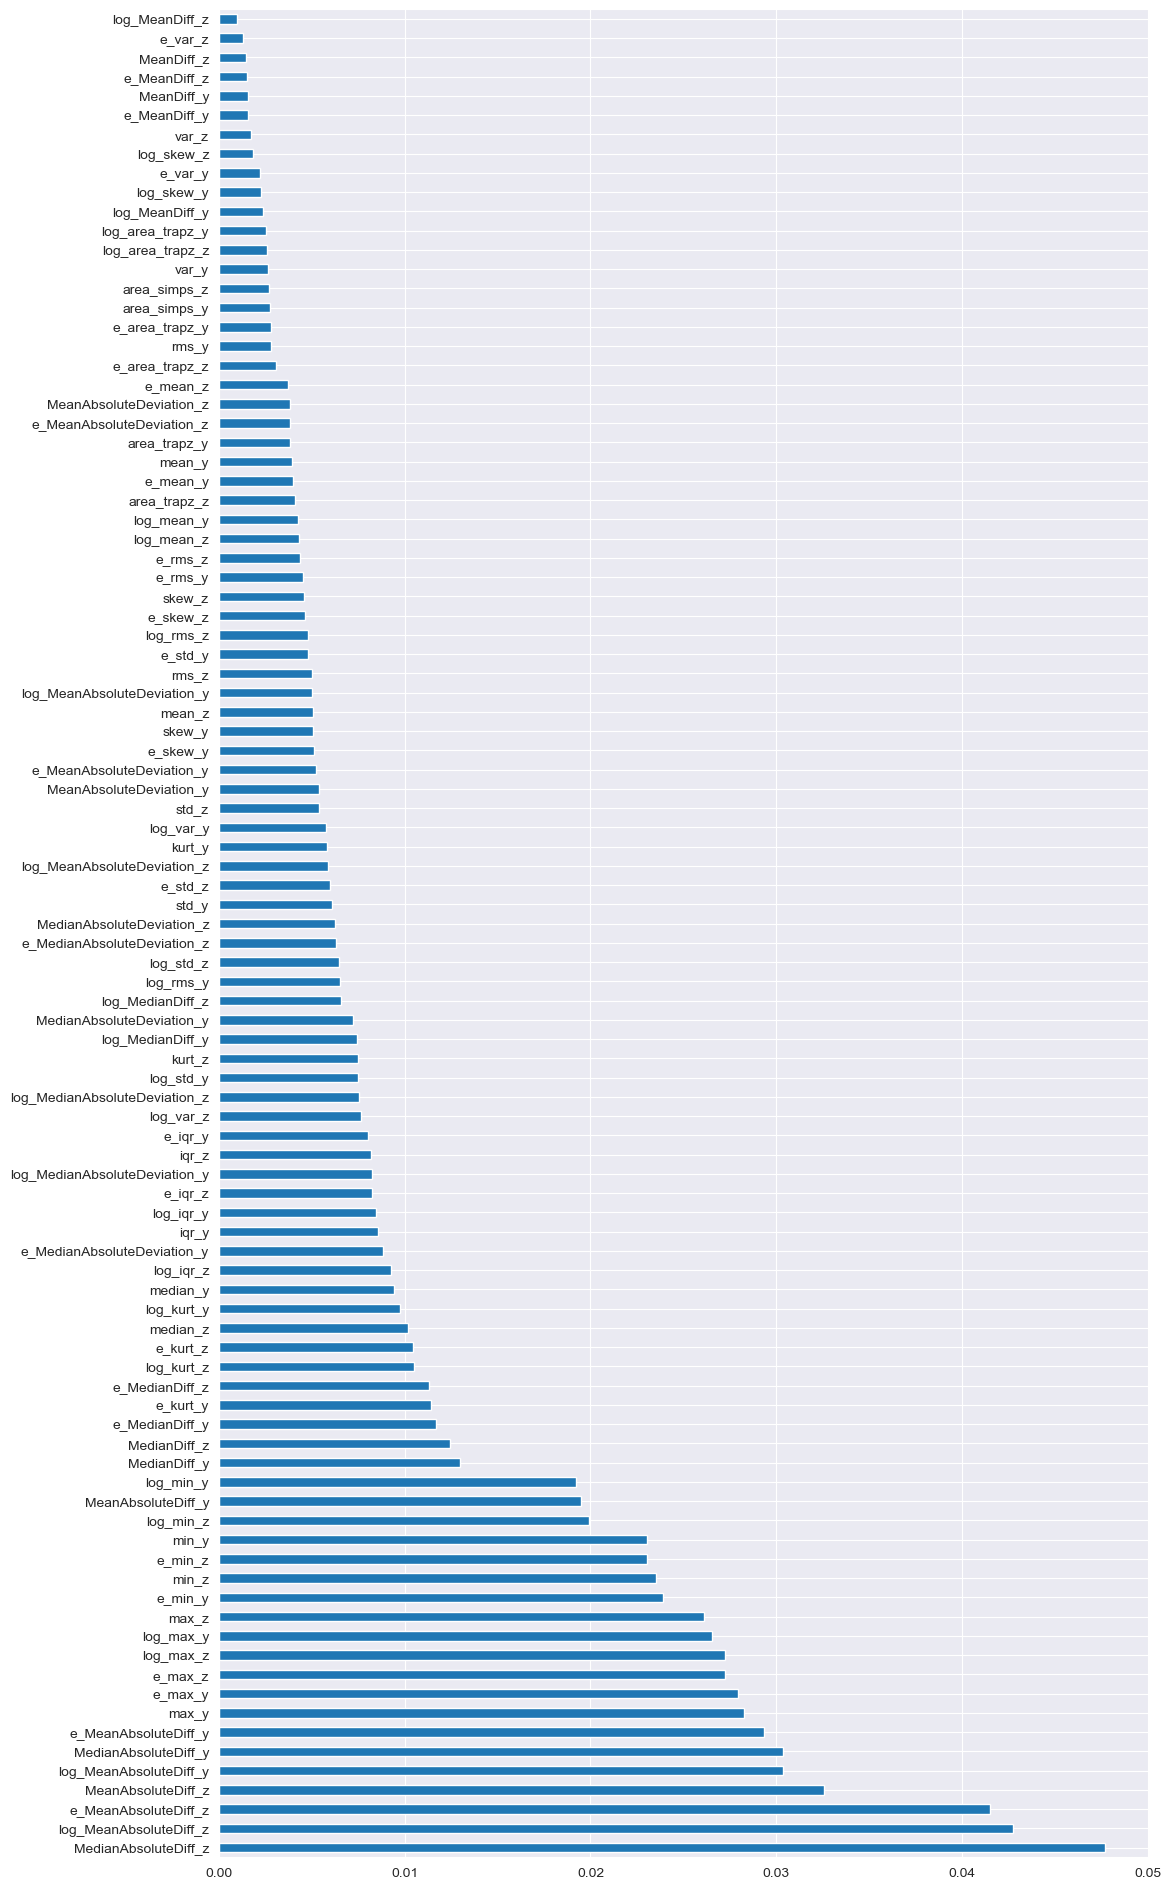

In [26]:
feat_importances.nlargest(108).plot(kind='barh',figsize=(12,24))

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import numpy as np
from lightgbm import LGBMClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from scipy import stats,integrate
from sklearn.metrics import roc_auc_score

## DataSet

In [2]:
def dataset(filename, window_size, label):
    raw_data = pd.read_csv(filename)[::10]
    raw_data = np.array(raw_data)
    features = pd.DataFrame()
    labels = pd.DataFrame()
    for i in range(0,raw_data.shape[0]-window_size):
        labels.loc[i,'label']=label
        seq = raw_data[i:i+window_size]
        y = seq[:,0]
        z = seq[:,1]
        features.loc[i,'MedianAbsoluteDiff_z'] = np.median(np.absolute(np.diff(z)))
        features.loc[i,'log_MeanAbsoluteDiff_z'] = np.log(np.median(np.absolute(np.diff(z))))
        features.loc[i,'log_MeanAbsoluteDiff_y'] = np.log(np.median(np.absolute(np.diff(y))))
        features.loc[i,'MedianAbsoluteDiff_y'] = np.median(np.absolute(np.diff(y)))
        features.loc[i,'max_y'] = np.max(y)
        features.loc[i,'e_max_z'] = np.exp(np.max(z))
        features.loc[i,'e_min_y'] = np.exp(np.min(y))
        features.loc[i,'min_z'] = np.min(z)
        features.loc[i,'MedianDiff_y'] = np.median(np.diff(y))
        features.loc[i,'MedianDiff_z'] = np.median(np.diff(z))
        features.loc[i,'e_kurt_y'] = np.exp(stats.kurtosis(y))
        features.loc[i,'median_z'] = np.median(z)
    return features,labels

X140_80,Y140_80 = dataset("../dataset/CriticalSpeed140/v80.csv", 80, 0)
X140_130,Y140_130 = dataset("../dataset/CriticalSpeed140/v130.csv", 80, 0)
X140_135,Y140_135 = dataset("../dataset/CriticalSpeed140/v135.csv", 80, 0)
X140_139,Y140_139 = dataset("../dataset/CriticalSpeed140/v139.csv", 80, 0)
X140_140,Y140_140 = dataset("../dataset/CriticalSpeed140/v140.csv", 80, 1)
X140_145,Y140_145 = dataset("../dataset/CriticalSpeed140/v145.csv", 80, 1)
X140_150,Y140_150 = dataset("../dataset/CriticalSpeed140/v150.csv", 80, 1)
X140_200,Y140_200 = dataset("../dataset/CriticalSpeed140/v200.csv", 80, 1)

X68_55,Y68_55 = dataset("../dataset/CriticalSpeed68/v55.csv", 80, 0)
X68_60,Y68_60 = dataset("../dataset/CriticalSpeed68/v60.csv", 80, 0)
X68_67,Y68_67 = dataset("../dataset/CriticalSpeed68/v67.csv", 80, 0)
X68_70,Y68_70 = dataset("../dataset/CriticalSpeed68/v70.csv", 80, 1)
X68_75,Y68_75 = dataset("../dataset/CriticalSpeed68/v75.csv", 80, 1)
X68_80,Y68_80 = dataset("../dataset/CriticalSpeed68/v80.csv", 80, 1)


x = pd.concat([X140_80,X140_130,X140_135,X140_139,X140_140,X140_145,X140_150,X140_200,X68_55,X68_60,X68_67,X68_70,X68_75,X68_80],ignore_index=True)
y = pd.concat([Y140_80,Y140_130,Y140_135,Y140_139,Y140_140,Y140_145,Y140_150,Y140_200,Y68_55,Y68_60,Y68_67,Y68_70,Y68_75,Y68_80],ignore_index=True)
numerical_cols = x.select_dtypes(exclude = 'object').columns
x = x[numerical_cols]
x = x.fillna(0)
x = x.clip(-1e8,1e8)
y = y['label'].fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_15068\2181674271.py:16: RuntimeWarning: overflow encountered in exp
  features.loc[i,'e_max_z'] = np.exp(np.max(z))


## Model Selection

In [3]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,random_state=1,test_size=0.2)

### LightGBM

In [4]:
lgm = LGBMClassifier(random_state=1)
lgm.fit(x_train,y_train)
print("LightGBM-Accuracy of TrainSet：",lgm.score(x_train,y_train))
print("LightGBM-Accuracy of TestSet：",lgm.score(x_test,y_test))
y_hat_lgm = lgm.predict(x_test)
lgm_roc_auc = roc_auc_score(y_test, lgm.predict(x_test))
print ("LightGBM AUC = %2.2f" % lgm_roc_auc)
print(metrics.classification_report(y_test,y_hat_lgm))

[LightGBM] [Info] Number of positive: 14643, number of negative: 18904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3059
[LightGBM] [Info] Number of data points in the train set: 33547, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436492 -> initscore=-0.255411
[LightGBM] [Info] Start training from score -0.255411
LightGBM-Accuracy of TrainSet： 0.9709661072525114
LightGBM-Accuracy of TestSet： 0.9636341957791821
LightGBM AUC = 0.96
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      4749
         1.0       0.97      0.95      0.96      3638

    accuracy                           0.96      8387
   macro avg       0.96      0.96      0.96      8387
weighted avg       0.96      0.96      0.96      83

### Decision Tree

In [5]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train,y_train)
print("Decision Tree-输出训练集的准确率为：",dtree.score(x_train,y_train))
print("Decision Tree-输出测试集的准确率为：",dtree.score(x_test,y_test))
y_hat_dtree = dtree.predict(x_test)
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(x_test))
print ("Decision Tree AUC = %2.2f" % dtree_roc_auc)
print(metrics.classification_report(y_test,y_hat_dtree))

Decision Tree-输出训练集的准确率为： 1.0
Decision Tree-输出测试集的准确率为： 0.9775843567425778
Decision Tree AUC = 0.98
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4749
         1.0       0.98      0.97      0.97      3638

    accuracy                           0.98      8387
   macro avg       0.98      0.98      0.98      8387
weighted avg       0.98      0.98      0.98      8387


### K-nearest Neighbours

In [6]:
knn = KNeighborsClassifier(n_neighbors=10,weights='uniform')
knn.fit(x_train,y_train)
print("K-nearest Neighbours-输出训练集的准确率为：",knn.score(x_train,y_train))
print("K-nearest Neighbours-输出测试集的准确率为：",knn.score(x_test,y_test))
y_hat_knn = knn.predict(x_test)
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
print ("K-nearest Neighbours AUC = %2.2f" % knn_roc_auc)
print(metrics.classification_report(y_test,y_hat_knn))

K-nearest Neighbours-输出训练集的准确率为： 0.8491966494768534
K-nearest Neighbours-输出测试集的准确率为： 0.8031477286276381
K-nearest Neighbours AUC = 0.79
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83      4749
         1.0       0.80      0.72      0.76      3638

    accuracy                           0.80      8387
   macro avg       0.80      0.79      0.80      8387
weighted avg       0.80      0.80      0.80      8387


### Gaussian NaiveBayes

In [7]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
print("Gaussian NaiveBayes-输出训练集的准确率为：",gnb.score(x_train,y_train))
print("Gaussian NaiveBayes-输出测试集的准确率为：",gnb.score(x_test,y_test))
y_hat_gnb = gnb.predict(x_test)
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(x_test))
print ("Gaussian NaiveBayes AUC = %2.2f" % gnb_roc_auc)
print(metrics.classification_report(y_test,y_hat_gnb))

Gaussian NaiveBayes-输出训练集的准确率为： 0.5959400244433183
Gaussian NaiveBayes-输出测试集的准确率为： 0.6008107785859068
Gaussian NaiveBayes AUC = 0.54
              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74      4749
         1.0       0.95      0.08      0.15      3638

    accuracy                           0.60      8387
   macro avg       0.77      0.54      0.45      8387
weighted avg       0.74      0.60      0.49      8387


### Support Vector Machine

In [8]:
Svm = svm.SVC(probability=True)
Svm.fit(x_train,y_train)
print("Support Vector Machine-输出训练集的准确率为：",Svm.score(x_train,y_train))
print("Support Vector Machine-输出测试集的准确率为：",Svm.score(x_test,y_test))
y_hat_svm = Svm.predict(x_test)
Svm_roc_auc = roc_auc_score(y_test, Svm.predict(x_test))
print ("Support Vector Machine AUC = %2.2f" % Svm_roc_auc)
print(metrics.classification_report(y_test,y_hat_svm))

Support Vector Machine-输出训练集的准确率为： 0.5960890690672788
Support Vector Machine-输出测试集的准确率为： 0.600930010730893
Support Vector Machine AUC = 0.54
              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74      4749
         1.0       0.95      0.08      0.16      3638

    accuracy                           0.60      8387
   macro avg       0.77      0.54      0.45      8387
weighted avg       0.74      0.60      0.49      8387


### XGBoost

In [9]:
xgb = XGBClassifier(random_state=1, use_label_encoder=False)
xgb.fit(x_train,y_train)
print("XGBoost-输出训练集的准确率为：",xgb.score(x_train,y_train))
print("XGBoost-输出测试集的准确率为：",xgb.score(x_test,y_test))
y_hat_xgb = xgb.predict(x_test)
xgb_roc_auc = roc_auc_score(y_test, xgb.predict(x_test))
print ("XGBoost AUC = %2.2f" % xgb_roc_auc)
print(metrics.classification_report(y_test,y_hat_xgb))

XGBoost-输出训练集的准确率为： 0.9959459862282768
XGBoost-输出测试集的准确率为： 0.990461428401097
XGBoost AUC = 0.99
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4749
         1.0       0.99      0.99      0.99      3638

    accuracy                           0.99      8387
   macro avg       0.99      0.99      0.99      8387
weighted avg       0.99      0.99      0.99      8387


### Importance of features selected

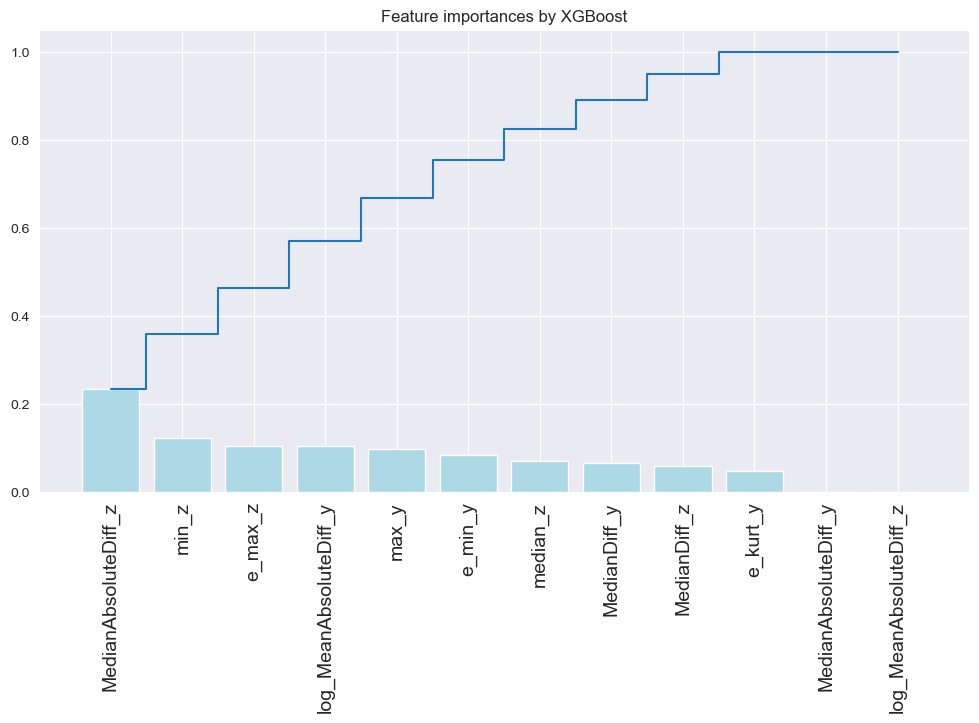

In [10]:
import matplotlib.pyplot as plt
importances = xgb.feature_importances_
feat_names = x.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by XGBoost")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## ROC Curve

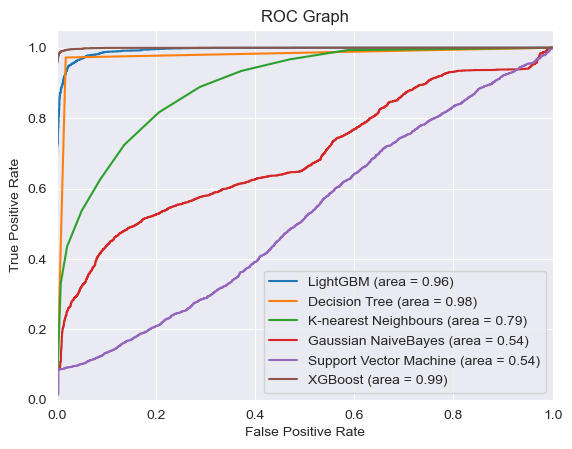

In [11]:

from sklearn.metrics import roc_curve
lgm_fpr, lgm_tpr, lgm_thresholds = roc_curve(y_test, lgm.predict_proba(x_test)[:,1])
dtree_fpr, dtree_tpr, dtree_thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
Svm_fpr, Svm_tpr, Svm_thresholds = roc_curve(y_test, Svm.predict_proba(x_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(lgm_fpr, lgm_tpr, label='LightGBM (area = %0.2f)' % lgm_roc_auc)
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='K-nearest Neighbours (area = %0.2f)' % knn_roc_auc)
plt.plot(gnb_fpr, gnb_tpr, label='Gaussian NaiveBayes (area = %0.2f)' % gnb_roc_auc)
plt.plot(Svm_fpr, Svm_tpr, label='Support Vector Machine (area = %0.2f)' % Svm_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
cm_lgm = confusion_matrix(y_test, y_hat_lgm)
cm_dtree = confusion_matrix(y_test, y_hat_dtree)
cm_knn = confusion_matrix(y_test, y_hat_knn)
cm_gnb = confusion_matrix(y_test, y_hat_gnb)
cm_svm = confusion_matrix(y_test, y_hat_svm)
cm_xgb = confusion_matrix(y_test, y_hat_xgb)


In [13]:
import itertools
# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes,sub_num,title,normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Input
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.subplot(2,3,sub_num)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4629  120]
 [ 185 3453]]
Confusion matrix, without normalization
[[4662   87]
 [ 101 3537]]
Confusion matrix, without normalization
[[4101  648]
 [1003 2635]]
Confusion matrix, without normalization
[[4733   16]
 [3332  306]]
Confusion matrix, without normalization
[[4732   17]
 [3330  308]]


C:\Users\user\AppData\Local\Temp\ipykernel_15068\516367249.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Confusion matrix, without normalization
[[4715   34]
 [  46 3592]]


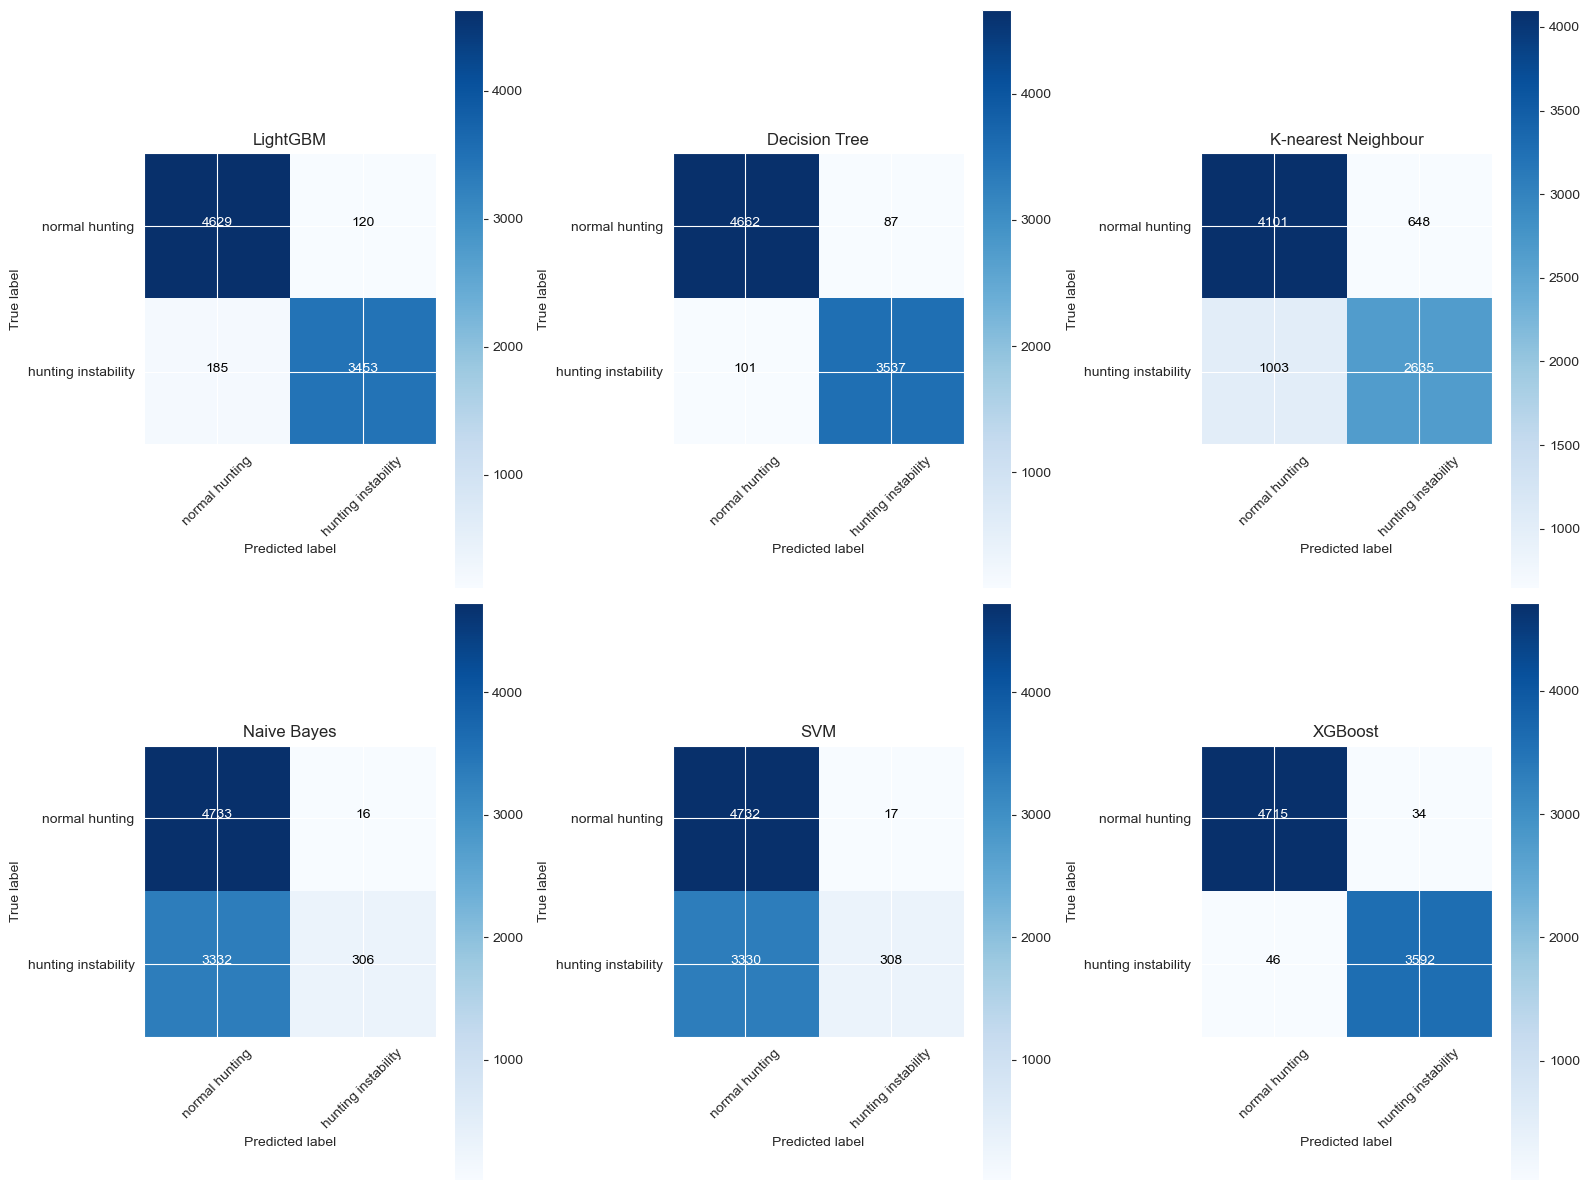

In [14]:
fig = plt.figure(figsize=(16, 12))
title = ["LightGBM","Decision Tree","K-nearest Neighbour", "Naive Bayes","SVM","XGBoost"]
cm = [cm_lgm,cm_dtree,cm_knn,cm_gnb,cm_svm,cm_xgb]
for i in range(1,len(cm)+1):
    plot_confusion_matrix(cm[i-1],title=title[i-1],classes=['normal hunting','hunting instability'],sub_num=i)